<a href="https://colab.research.google.com/github/RutunjayRao/MonteCarloSimulations/blob/random-walks%2C-lognormal-and-AR(1)/randomwalks_lognormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 20 Step random walk

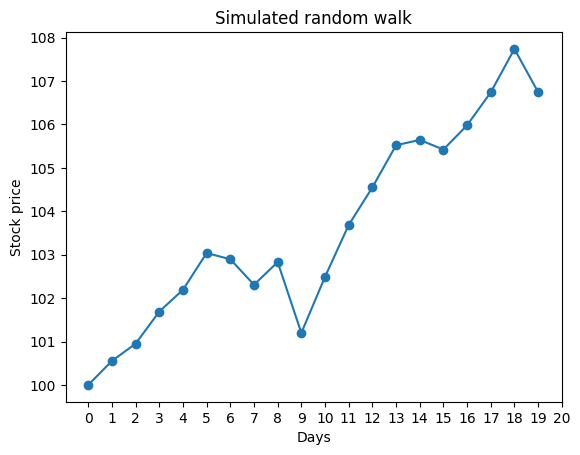

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

#Generate 20 random steps with mean=0 and SD=1
steps = np.random.normal(loc=0, scale =1, size=20)

steps[0] = 0

#Simulate stock prices, P, with a starting price of 100
P = 100+np.cumsum(steps)

#plot the simulated stock prices
plt.plot(P, marker='o')
plt.title('Simulated random walk')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.xticks(np.arange(0,21,1))
plt.show()

## Many simulations of a one year daily walk

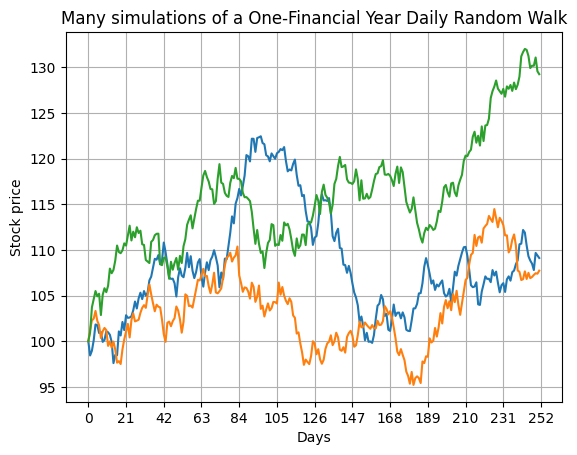

In [7]:
num_simulations = 50000
num_days = 252 #Financial market days

simulated_prices = np.zeros((num_simulations, num_days))

#Performing simulations:
for i in range(num_simulations):
  steps = np.random.normal(loc=0, scale=1, size = num_days) #Generating random steps with mean 0 and SD 1

  simulated_prices[i,0] = 100 #initial price(principal)

  for j in range(1, num_days):
    simulated_prices[i,j] = simulated_prices[i, j-1] + steps[j] #simulating stock prices

#Randomly selecting 3 paths to plot
random_paths = np.random.choice(num_simulations, size=3, replace=False)

#plotting the paths
for i in random_paths:
  plt.plot(simulated_prices[i])

plt.title('Many simulations of a One-Financial Year Daily Random Walk')
plt.xlabel('Days')
plt.ylabel('Stock price')
plt.xticks(np.arange(0, num_days+1, 21))
plt.grid(True)
plt.show()

### Simulating a lognormal price process

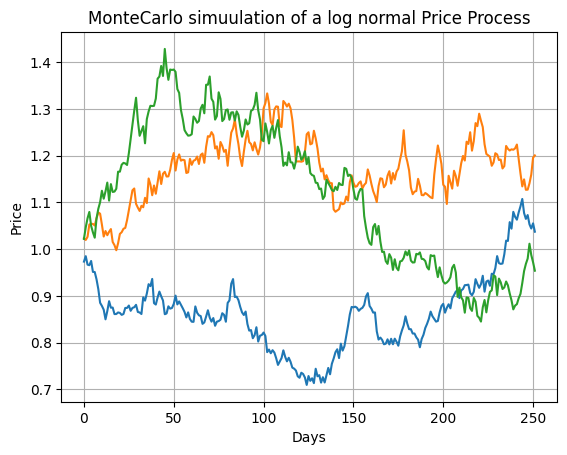


Mean from simulation is 0.059192 while the expected log return is  0.056541
	
SD of simulation is  0.291188 while SD is  0.3




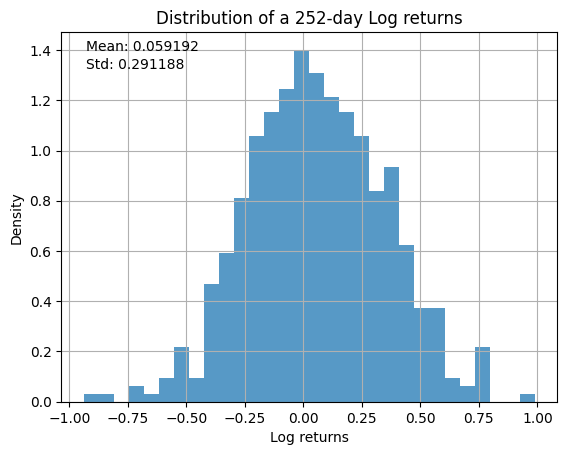

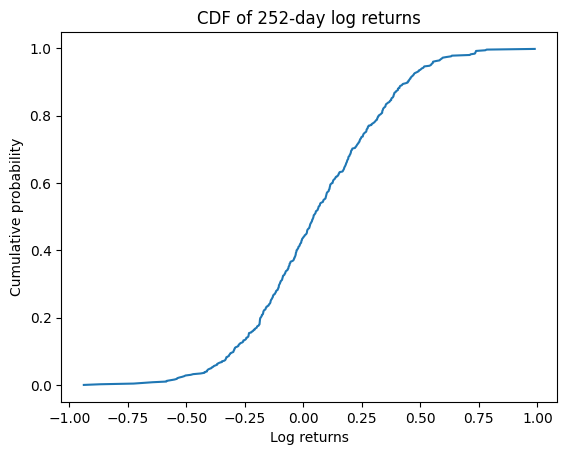

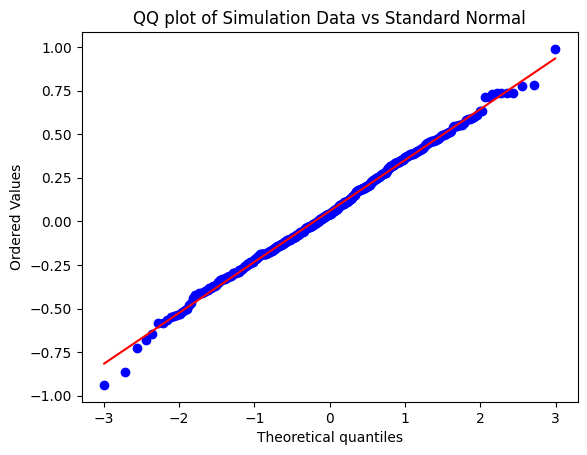

In [16]:
#Setting parameters
mean = 0.1
sigma = 0.3

#daily mean and stddev

daily_mean = mean/252
daily_vol = sigma/np.sqrt(252)

#setting principal and number of days
initial_price = 1
num_days = 252

#num_sims
num_simulations = 500
simulated_prices = np.zeros((num_simulations, num_days))

#performing simulations
for i in range(num_simulations):
  #daily returns
  daily_returns = np.random.normal(daily_mean, daily_vol, num_days)

  #cumulative returns
  cumulative_returns = np.cumprod(1 + daily_returns)

  #simulated prices
  simulated_prices[i] = initial_price * cumulative_returns

random_paths = np.random.choice(num_simulations, size=3, replace=False)

for i in random_paths:
  plt.plot(simulated_prices[i])

plt.title('MonteCarlo simuulation of a log normal Price Process')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#Using 1st and 2nd moments distribution
log_returns = np.log(simulated_prices[:, -1]/initial_price)

Expected_log_return = round(math.exp(mean - ((sigma**2)/2))-1, 6)

mean_from_simulation = round(np.mean(log_returns), 6)
print('\nMean from simulation is', mean_from_simulation, 'while the expected log return is ', Expected_log_return)
print('\t')

std_from_simulation = round(np.std(log_returns), 6)
print('SD of simulation is ', std_from_simulation, 'while SD is ', sigma)
print('\n')

#plotting distribution
plt.hist(log_returns, bins=30, density=True, alpha =0.75)
plt.title('Distribution of a 252-day Log returns')
plt.xlabel('Log returns')
plt.ylabel('Density')
plt.grid(True)
plt.annotate(f'Mean: {mean_from_simulation}', xy=(0.05, 0.95), xycoords = 'axes fraction')
plt.annotate(f'Std: {std_from_simulation}', xy=(0.05, 0.9), xycoords = 'axes fraction')
plt.show()

#plotting cdf
plt.plot(np.sort(log_returns), np.linspace(0,1,len(log_returns), endpoint=False))
plt.title('CDF of 252-day log returns')
plt.xlabel('Log returns')
plt.ylabel('Cumulative probability')
plt.show()

#Generate a QQ plot
stats.probplot(log_returns, dist='norm', plot=plt)
plt.title('QQ plot of Simulation Data vs Standard Normal')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()